# Make a copy of this notebook; make sure to change all the paths appropriately

# Run the following cell to install required packages then restart runtime

In [0]:
!git clone https://github.com/guol1nag/datagrasp.git
!pip3 install -r datagrasp/requirements.txt -q

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.11.1)
     |████████████████████████████████| 880kB 14.5MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 358kB 60.8MB/s 
     |████████████████████████████████| 3.1MB 59.4MB/s 
     |████████████████████████████████| 2.3MB 42.7MB/s 
     |████████████████████████████████| 235kB 51.6MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 


# Run this cell to import the key libaries

In [0]:
#Key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
import scipy
from statsmodels.tsa.stattools import adfuller, coint
import statsmodels
import empyrical
from datagrasp.code.indicatordownloader import *

#plotting
sns.set()
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

# Be sure to mount your Google Drive, run the cells below

# Make sure to change the path of your copy of the datagrasp folder

In [0]:
#File
from google.colab import drive
drive.mount('/content/drive')
#change this to the location of your copy of the google drive folder 
path = 'drive/My Drive/Datagrasp - 256 Ventures/datasets/' 
kind = 'CoinPrice'

Mounted at /content/drive


# Run the  following three cells to download new data
# This requires your binance key pairs in the cell below 2  cells down 
#  Enter it then remove




In [0]:
#KEY Parameters
API_KEY = "w1Ir6bji5wJAQgE2UqwIoH2Paa12Rup3Ropqjo9QXQiCdN0eI6VBM5MkQMNgZ40a"
API_SECRET="IlCdbVGmIwA9yuEfmo71TZYQKR1w8VwraOPeWWZq7DT7jkvzi0uoMrSRZwquYyFd"
QUANDL_API = 'siujBjhDGbM3hcn3sjTS'

#change fullpath to the location of your dataset
path = 'drive/My Drive/Datagrasp - 256 Ventures/datasets/' 
fullpath = path+'CoinPrice'
fullpath2 = path+"Indicator"

tickers = ['BTC','ETH','BNB','EOS','XRP', "XTZ", "LINK"]
FREQ = "DAY"

#Function call
'''
Takes in a list of TICKERS
your BINANCE API keys
the frequency of your Data (DAY, HOUR, MINUTE)
FULLPATH is the location you want to save to
WRITE is whether you want to output to a csv
'''
data = downloadWrapper(tickers, API_SECRET, API_KEY, FREQ, fullpath)

# **Otherwise make sure to run this and select from available coins**



In [0]:
temp = pd.read_csv(f"{path}{kind}/UNIVERSE_DAY.csv")
print(temp.columns)

Index(['date', 'BTC_open', 'BTC_high', 'BTC_low', 'BTC_close', 'BTC_volume',
       'BTC_quote_asset_volume', 'BTC_number_of_trades',
       'BTC_ taker_buy_base_asset_volume', 'BTC_taker_buy_quote_asset_volume',
       'BTC_ohlc', 'BTC_returns', 'BTC_date', 'ETH_open', 'ETH_high',
       'ETH_low', 'ETH_close', 'ETH_volume', 'ETH_quote_asset_volume',
       'ETH_number_of_trades', 'ETH_ taker_buy_base_asset_volume',
       'ETH_taker_buy_quote_asset_volume', 'ETH_ohlc', 'ETH_returns',
       'ETH_date', 'BNB_open', 'BNB_high', 'BNB_low', 'BNB_close',
       'BNB_volume', 'BNB_quote_asset_volume', 'BNB_number_of_trades',
       'BNB_ taker_buy_base_asset_volume', 'BNB_taker_buy_quote_asset_volume',
       'BNB_ohlc', 'BNB_returns', 'BNB_date', 'EOS_open', 'EOS_high',
       'EOS_low', 'EOS_close', 'EOS_volume', 'EOS_quote_asset_volume',
       'EOS_number_of_trades', 'EOS_ taker_buy_base_asset_volume',
       'EOS_taker_buy_quote_asset_volume', 'EOS_ohlc', 'EOS_returns',
       'EOS_da

# Correlations ; Returns and Close respectively

#Run the cell below to get a correlation matrix on your key paris

# Choose your own lookback WINDOW to consider (past WINDOW days)

In [0]:
def plotCorrelation(WINDOW, tickers):
  fig,ax = plt.subplots(figsize=(20,7.5),ncols=2)
  
  #correlation between returns
  sns.heatmap(temp[[x+  "_returns" for x in tickers]].iloc[-WINDOW:].corr(),annot=True,ax=ax[0])

  #correlation betwen closing prices
  sns.heatmap(temp[[x+"_close" for x in tickers]].iloc[-WINDOW:].corr(),annot=True,ax=ax[1])


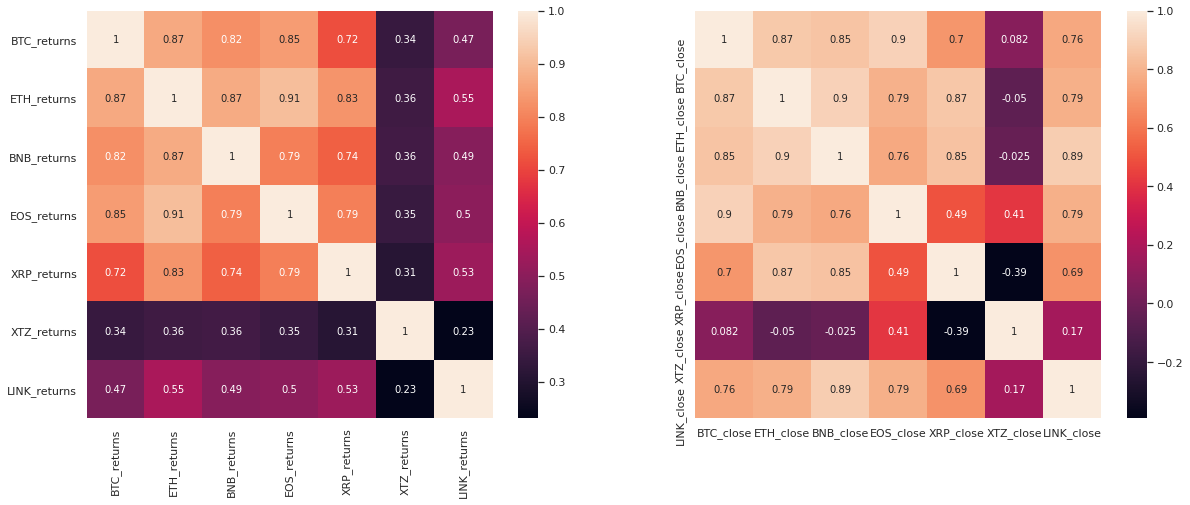

In [0]:
WINDOW = 900
plotCorrelation(WINDOW, tickers)

# Cointegration

# Run the cell below to get a plot of the cointegration of pairs; Returns and Close prices respectively

## the cell value is the p-value; lower is better

## Choose your own lookback window of observatiosn

In [0]:
def plotCointegration(WINDOW, tickers):
  n = len(tickers)
  coints_prices = np.ones((n, n))
  coints_returns = np.ones((n, n))
  ticker_close = [x+  "_close" for x in tickers]
  ticker_returns = [x+  "_returns" for x in tickers]

  for i in range(n - 1):
    for j in range(i+1, n):
      tscore, p, thresholds = coint(temp[ticker_close[i]].iloc[-WINDOW:].values, temp[ticker_close[j]].iloc[-WINDOW:].values)
      coints_prices[i, j] = p

  
  

  for i in range(n - 1):
    for j in range(i+1, n):
      tscore, p, thresholds = coint(temp[ticker_returns[i]].iloc[-WINDOW:].fillna(1).values, temp[ticker_returns[j]].iloc[-WINDOW:].fillna(1).values)
      coints_returns[i, j] = p

  fig,ax = plt.subplots(figsize=(15,5),ncols=2)
  sns.heatmap(coints_returns,xticklabels=tickers,yticklabels=tickers,cmap="RdYlGn_r",annot=True,ax = ax[0])
  ax[0].set_title("Cointegration of Returns")
  sns.heatmap(coints_prices,xticklabels=tickers,yticklabels=tickers,cmap="RdYlGn_r",annot=True, ax = ax[1])
  ax[1].set_title("Cointegration of Prices")

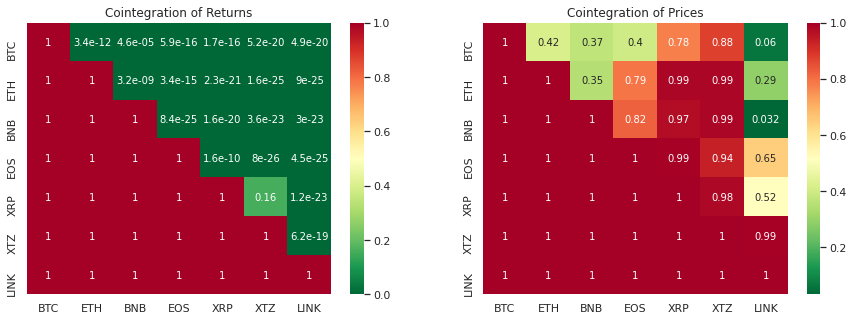

In [0]:
#last 900
WINDOW=900
plotCointegration(WINDOW, tickers)

# Plot and Produce Summary Statistics of Different Ratios (of Price and Returns, and Price Differences)
# This will give us an idea of whether a mean reversion strategy is viable

# **Enter your pair below**

# **Make Sure to Run this as it also generates the indicators to use**

Ratio of Returns
Goodness of Fit to Normal p-value: 0.00003
Adfuller p-value (test for stationarity): 4.468116708089554e-18
Mean: 0.9991346343210344
Standard Deviation: 0.018205038304306146
Skew 0.5024750441863195

Log Ratio of Returns
Goodness of Fit to Normal p-value: 0.00019
Adfuller p-value (test for stationarity): 3.617400747448719e-18
Mean: -0.0010308881564729025
Standard Deviation: 0.018152779983482893
Skew 0.3746297644931627

Price Ratio
Goodness of Fit to Normal p-value: 0.00060
Adfuller p-value (test for stationarity): 0.6343801813950366
Mean: 50.14432834538605
Standard Deviation: 3.6803886257078635
Skew 0.43585381482005714

Price Ratio Difference
Goodness of Fit to Normal p-value: 0.00007
Adfuller p-value (test for stationarity): 2.387737097690241e-18
Mean: -0.049220198280485274
Standard Deviation: 0.9175485402582685
Skew 0.37817409699869137


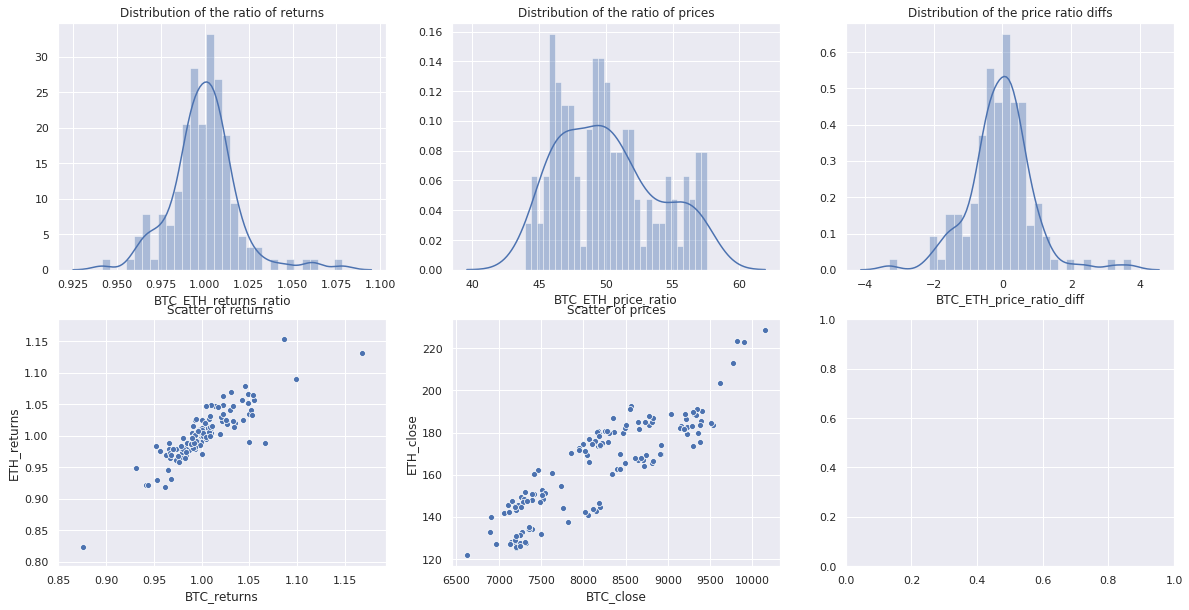

In [0]:
import scipy

def statistics(x):
  k, p = scipy.stats.normaltest(x, nan_policy='omit')
  mu = np.mean(x)
  std = np.std(x)
  adfuller_p = adfuller(x)[1]
  skew = f"Skew {scipy.stats.skew(x, nan_policy='omit')}"
  normal_fit = f"Goodness of Fit to Normal p-value: {p:.5f}"
  mean = f"Mean: {mu}"
  Adfuller = f"Adfuller p-value (test for stationarity): {adfuller_p}"
  SD = f"Standard Deviation: {std}"
  print(normal_fit+"\n"+Adfuller+"\n"+mean+"\n"+SD+"\n"+skew)
  return

def plotRatio(ticker1, ticker2):
  temp[f"{ticker1}_{ticker2}_returns_ratio"] = (temp[f'{ticker1}_returns'] / temp[f'{ticker2}_returns'])
  temp[f"{ticker1}_{ticker2}_price_ratio"] = (temp[f'{ticker1}_close'] / temp[f'{ticker2}_close'])
  temp[f"{ticker1}_{ticker2}_price_ratio_diff"] = temp[f'{ticker1}_{ticker2}_price_ratio'].diff(1)
  print("Ratio of Returns")
  statistics(temp[f'{ticker1}_{ticker2}_returns_ratio'].iloc[1:])
  print("\nLog Ratio of Returns")
  statistics(np.log(temp[f'{ticker1}_{ticker2}_returns_ratio'].iloc[1:]))
  print("\nPrice Ratio")
  statistics(temp[f'{ticker1}_{ticker2}_price_ratio'].iloc[1:])
  print("\nPrice Ratio Difference")
  statistics(temp[f'{ticker1}_{ticker2}_price_ratio_diff'].iloc[1:])
  
  fig2, ax = plt.subplots(figsize=(20,10),ncols=3,nrows=2)
  sns.distplot(temp[f'{ticker1}_{ticker2}_returns_ratio'],kde=True,bins=30,ax=ax[0,0])
  ax[0,0].set_title("Distribution of the ratio of returns")
  sns.distplot(temp[f'{ticker1}_{ticker2}_price_ratio'],kde=True,bins=30,ax=ax[0,1])
  ax[0,1].set_title("Distribution of the ratio of prices")
  sns.distplot(temp[f'{ticker1}_{ticker2}_price_ratio_diff'],kde=True,bins=30,ax=ax[0,2])
  ax[0,2].set_title("Distribution of the price ratio diffs")
  sns.scatterplot(x=temp[f"{ticker1}_returns"],y=temp[f"{ticker2}_returns"],ax=ax[1,0])
  ax[1,0].set_title("Scatter of returns ")
  sns.scatterplot(x=temp[f"{ticker1}_close"],y=temp[f"{ticker2}_close"],ax=ax[1,1])
  ax[1,1].set_title("Scatter of prices")

  fig = px.line(x=temp['date'],y=temp[f'{ticker1}_{ticker2}_returns_ratio'], title=f"{ticker1}_{ticker2}_returns_ratio")
  fig.show()
  fig3 = px.line(x=temp['date'],y=temp[f'{ticker1}_{ticker2}_price_ratio'], title=f"{ticker1}_{ticker2}_price_ratio")
  fig3.show()
  fig4 = px.line(x=temp['date'],y=temp[f"{ticker1}_{ticker2}_price_ratio_diff"], title=f"{ticker1}_{ticker2}_price_ratio_diff")
  fig4.show()
  # fig2 = px.line(x=temp['date'],y=temp[f"{'{ticker1}_{ticker2}_returns_ratio'}"], title=f"{ticker1} to {ticker2} {kind} ratio")
  return  

#Enter your pair here
plotRatio("BTC","ETH")

# Run the following 3 cells to backtest your specific pair



## Set your own p-value / z-score thresholds "sellPValue" and "buyPValue" - more tailed values (e.g. 0.1, 0.9) mean that you want a greater "confidence" but fewer trades; more central values (0.4, 0,6) represent greater risk, lower confidence but more trades

### You can assume mean reversion; that you short when a unit of the pair is above the mean and long when it is below the mean if you select sellPValue < 0.5  < buyPValue

## Or you can assume trend; short when the ratio is deviated lower from the mean and long if the ratio has deviated above the mean, if you select buyPValue < 0.5  < sellPValue

In [0]:
#backtest helper function, returns a dataframe of trades
def backtest(ticker1, ticker2, sellPValue=0.55, buyPValue=0.45, starting_cap=10000, transactionCostsPct=0, indicator="returns_ratio"):
  data = temp[[f'{ticker1}_open',f'{ticker2}_open',
               f'{ticker1}_high',f'{ticker2}_high',
               f'{ticker1}_low',f'{ticker2}_low',
               f'{ticker1}_close',f'{ticker2}_close',
               f'{ticker1}_returns',f'{ticker2}_returns',
               f'{ticker1}_{ticker2}_returns_ratio',f'{ticker1}_{ticker2}_price_ratio_diff','date']].copy()
  data[f'{ticker1}_{ticker2}_returns_ratio_last'] = data[f'{ticker1}_{ticker2}_returns_ratio'].shift(1)
  data[f'{ticker1}_{ticker2}_price_ratio_diff_last'] = data[f'{ticker1}_{ticker2}_price_ratio_diff'].shift(1)



  #units of cash, units of ticker1, units of ticker2, traded, time , equity, returns
  data['cash'] = 0
  data['value'] = 0
  data['traded'] = 0
  data[f'{ticker1}_unit'] = 0
  data[f'{ticker2}_unit'] = 0


  # #initialise initial positions
  data.loc[1,["cash","value"]] = starting_cap
  if indicator == 'price_ratio_diff':
    mu = data[f'{ticker1}_{ticker2}_price_ratio_diff'].mean()
    std = data[f'{ticker1}_{ticker2}_price_ratio_diff'].std()
  else:
    mu = data[f'{ticker1}_{ticker2}_returns_ratio'].mean()
    std = data[f'{ticker1}_{ticker2}_returns_ratio'].std()

  for i in range(2,data.shape[0]):
    ticker1_price = data.iloc[i][f"{ticker1}_open"]
    ticker2_price = data.iloc[i][f'{ticker2}_open']
    data.loc[i,["cash",f'{ticker1}_unit', f'{ticker2}_unit']] = data.loc[i-1,["cash",f'{ticker1}_unit', f'{ticker2}_unit']]
  
    #kelly criterion position sizing
    if indicator == 'price_ratio_diff':
      signal = data.loc[i,f'{ticker1}_{ticker2}_price_ratio_diff_last']
    else:
      signal = data.loc[i,f'{ticker1}_{ticker2}_returns_ratio_last']
    p  = scipy.stats.norm.cdf(signal,loc=mu,scale=std)
    
    #cost to long 1 unit of the ratio
    cost = (ticker1_price - ticker2_price)
    #if the ratio is highly above mean; set your proportion of equity to be p
    if p > sellPValue: #p > 1
      data.loc[i,'traded'] = -1                                  
      data.loc[i,f'{ticker1}_unit'] = p * data.loc[i-1, 'value'] / cost
      data.loc[i,f'{ticker2}_unit'] = -p  * data.loc[i-1, 'value'] / cost
      #buy ticker1
      data.loc[i,"cash"] -= (data.loc[i,f'{ticker1}_unit'] - data.loc[i-1,f'{ticker1}_unit']) * cost
  #   #if the ratio is significantly below mean;
    elif p < buyPValue:
      data.loc[i,'traded'] = 1
      data.loc[i,f'{ticker1}_unit'] = p * data.loc[i-1, 'value'] / cost
      data.loc[i,f'{ticker2}_unit'] = -p * data.loc[i-1, 'value']/ cost
      #buy ticker1
      data.loc[i,"cash"] -=  (data.loc[i,f'{ticker1}_unit'] - data.loc[i-1,f'{ticker1}_unit']) * cost
      
  #   #exit positions if they are trading in a normal range
    else:
      #0 positions
      data.loc[i,f'{ticker1}_unit'] = 0
      data.loc[i,f'{ticker2}_unit'] = 0
      data.loc[i,"cash"] += data.loc[i-1,f'{ticker1}_unit'] * cost

    value = data.loc[i,f'{ticker1}_close'] * data.loc[i,f'{ticker1}_unit'] + data.loc[i,f'{ticker2}_close'] * data.loc[i,f'{ticker2}_unit'] + data.iloc[i]['cash']
    data.loc[i,"value"] = value
  
  data['returns'] = data['value']  / data['value'].shift(1)
  # backtest = pd.merge(positions.iloc[1:], data,on='date')
  return data

def diagnosis(backtestResults, ticker1, ticker2):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=backtestResults.loc[2:,'date'], y=np.exp(np.log(backtestResults.loc[2:,'returns']).cumsum()),
                    mode='markers+lines',
                    marker_color=backtestResults.loc[2:,'traded'],
                    name='Strategy Returns (Cumulative)'))
  fig.add_trace(go.Scatter(x=backtestResults.loc[2:,'date'], y=np.exp(np.log(backtestResults.loc[2:,f'{ticker1}_returns']).cumsum()),
                    mode='lines',
                    name=f'{ticker1} Returns (Cumulative)'))
  fig.add_trace(go.Scatter(x=backtestResults.loc[2:,'date'], y=np.exp(np.log(backtestResults.loc[2:,f'{ticker2}_returns']).cumsum()),
                    mode='lines',
                    name=f'{ticker2} Returns (Cumulative)'))
  fig.show()

  fig2 = go.Figure()
  fig2.add_trace(go.Scatter(x=backtestResults.loc[2:,'date'], y=backtestResults.loc[2:,'returns'],
                    mode='markers+lines',
                    marker_color=backtestResults.loc[2:,'traded'],
                    name='Strategy Returns'))
  fig2.add_trace(go.Scatter(x=backtestResults.loc[2:,'date'], y=backtestResults.loc[2:,f'{ticker1}_returns'],
                    mode='lines',
                    name=f'{ticker1} Returns'))
  fig2.add_trace(go.Scatter(x=backtestResults.loc[2:,'date'], y=backtestResults.loc[2:,f'{ticker2}_returns'],
                    mode='lines',
                    name=f'{ticker2} Returns'))
  fig2.show()

  
  sharpe = empyrical.sharpe_ratio(backtestResults.loc[2:,'returns']-1,risk_free=0)
  md = empyrical.max_drawdown(backtestResults.loc[2:,'returns']-1)
  sortino = empyrical.sortino_ratio(backtestResults.loc[2:,'returns']-1,required_return=1.07**(1/365)-1)
  print(f"Sharpe: {sharpe}\n Max Drawdown: {md}\n Sortino: {sortino}")
  return

In [0]:
backtestResult = backtest("BTC","ETH",sellPValue=0.3,buyPValue=0.7, indicator='price_ratio_diff')

#save your results
ticker1 = "BTC"
ticker2 = "ETH"
backtestResult.to_csv(f"{path}{kind}/{ticker1}_{ticker2}_backtest_result_{str(datetime.datetime.now())}.csv")

#plot your
diagnosis(backtestResult.loc[2:], "BTC", "ETH")

Sharpe: 1.3691746960766715
 Max Drawdown: -0.20440379913841386
 Sortino: 2.4670430989998726


In [0]:
signal = temp.iloc[-1][f'{ticker1}_{ticker2}_returns_ratio_last']
p  = scipy.stats.norm.cdf(signal,loc=mu,scale=std)
if p > 0.5:
  print("The last observation is above the mean")
else:
  print("The last observation is below the mean")